In [25]:
import xgboost as xgb

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("../data2.csv")

In [28]:
df = df.drop(['Name', 'Peak Season', 'Before Season months', 'Months left for End of Season', 'Gender', 'TransactionCount', 'Unnamed: 0'], axis=1)

x = df.iloc[:,0:16]
y = df.iloc[:,16:17]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [31]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled)

In [32]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'eval_metric': 'rmse'
}

<Figure size 2000x1000 with 0 Axes>

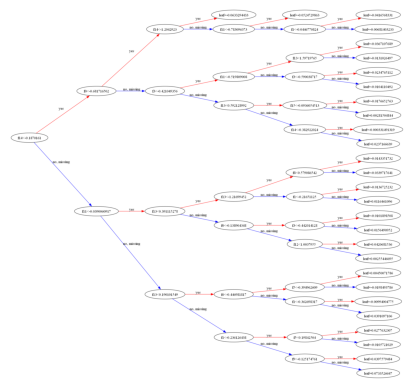

In [33]:
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
xgb.plot_tree(model, num_trees=0, rankdir='LR')  # Adjust num_trees to visualize a different tree
plt.savefig('xgboost_tree.png', dpi=1000)
plt.show()

In [34]:
y_pred_prob = model.predict(dtest)

In [35]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
print(mean_squared_error(y_test_scaled,y_pred_prob))
print(mean_absolute_error(y_test_scaled,y_pred_prob))


0.2402200381129722
0.37314520759916153
